In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [70]:
import joblib
import seaborn as sns
from scipy.stats import ks_2samp

In [2]:
RANDOM_SEED = 10
np.random.seed(RANDOM_SEED)

# Carregando o conjunto de dados

In [85]:
df = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [86]:
df_train, df_val = train_test_split(df, test_size=0.6, random_state=RANDOM_SEED)

In [87]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
266,266,19908,Female,Loyal Customer,37,Business travel,Business,1801,2,4,...,2,2,2,2,1,2,4,0,0.0,neutral or dissatisfied
62627,62627,69934,Male,Loyal Customer,25,Business travel,Business,2174,2,4,...,2,3,2,4,2,4,2,0,0.0,neutral or dissatisfied
61446,61446,89105,Male,Loyal Customer,66,Business travel,Eco,1947,1,2,...,1,1,3,2,1,3,1,0,0.0,neutral or dissatisfied
64495,64495,91559,Female,Loyal Customer,52,Personal Travel,Eco,680,2,5,...,1,1,2,1,3,1,5,77,67.0,neutral or dissatisfied
69454,69454,15221,Female,disloyal Customer,45,Business travel,Eco,416,3,0,...,2,5,1,3,4,4,2,18,1.0,neutral or dissatisfied


In [88]:
df_train.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [89]:
# Convert to category type
df_train['Gender'] = df_train['Gender'].astype('category')
df_train['Customer Type'] = df_train['Customer Type'].astype('category')
df_train['Type of Travel'] = df_train['Type of Travel'].astype('category')
df_train['Class'] = df_train['Class'].astype('category')
df_train['satisfaction'] = df_train['satisfaction'].astype('category')

In [90]:
# List of categorical columns
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

for column in categorical_columns:
    unique_values = df_train[column].unique()
    print(f'{column} has {len(unique_values)} unique categories: {unique_values}')

Gender has 2 unique categories: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
Customer Type has 2 unique categories: ['Loyal Customer', 'disloyal Customer']
Categories (2, object): ['Loyal Customer', 'disloyal Customer']
Type of Travel has 2 unique categories: ['Business travel', 'Personal Travel']
Categories (2, object): ['Business travel', 'Personal Travel']
Class has 3 unique categories: ['Business', 'Eco', 'Eco Plus']
Categories (3, object): ['Business', 'Eco', 'Eco Plus']
satisfaction has 2 unique categories: ['neutral or dissatisfied', 'satisfied']
Categories (2, object): ['neutral or dissatisfied', 'satisfied']


In [91]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41561 entries, 266 to 83209
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Unnamed: 0                         41561 non-null  int64   
 1   id                                 41561 non-null  int64   
 2   Gender                             41561 non-null  category
 3   Customer Type                      41561 non-null  category
 4   Age                                41561 non-null  int64   
 5   Type of Travel                     41561 non-null  category
 6   Class                              41561 non-null  category
 7   Flight Distance                    41561 non-null  int64   
 8   Inflight wifi service              41561 non-null  int64   
 9   Departure/Arrival time convenient  41561 non-null  int64   
 10  Ease of Online booking             41561 non-null  int64   
 11  Gate location                      4156

In [92]:
# Perform one-hot encoding
df_train = pd.get_dummies(df_train, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'])

In [93]:
spearman_corr_df = df_train.corr(method='spearman')

In [94]:
spearman_corr_df['satisfaction_satisfied'].sort_values(ascending=False)

satisfaction_satisfied                  1.000000
Online boarding                         0.549373
Class_Business                          0.500813
Type of Travel_Business travel          0.444745
Inflight entertainment                  0.403266
Seat comfort                            0.364929
On-board service                        0.326287
Leg room service                        0.321098
Cleanliness                             0.307570
Inflight wifi service                   0.285538
Baggage handling                        0.264854
Inflight service                        0.260552
Flight Distance                         0.258360
Checkin service                         0.229601
Food and drink                          0.213566
Customer Type_Loyal Customer            0.184636
Ease of Online booking                  0.174876
Age                                     0.143926
id                                      0.018203
Gender_Male                             0.011968
Gate location       

In [95]:
df_train.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [96]:
df_train.shape

(41561, 29)

# Lidando com dados ausentes

In [97]:
df_train.isnull().sum()

Age                                       0
Flight Distance                           0
Inflight wifi service                     0
Departure/Arrival time convenient         0
Ease of Online booking                    0
Gate location                             0
Food and drink                            0
Online boarding                           0
Seat comfort                              0
Inflight entertainment                    0
On-board service                          0
Leg room service                          0
Baggage handling                          0
Checkin service                           0
Inflight service                          0
Cleanliness                               0
Departure Delay in Minutes                0
Arrival Delay in Minutes                128
Gender_Female                             0
Gender_Male                               0
Customer Type_Loyal Customer              0
Customer Type_disloyal Customer           0
Type of Travel_Business travel  

In [98]:
columns_with_nan = ['Arrival Delay in Minutes']

In [99]:
df_train[columns_with_nan].describe()

,Arrival Delay in Minutes
count,41433.000000
mean,15.176840
std,38.649157
min,0.000000
25%,0.000000
50%,0.000000
75%,13.000000
max,1280.000000


array([[<Axes: title={'center': 'Arrival Delay in Minutes'}>]],
      dtype=object)

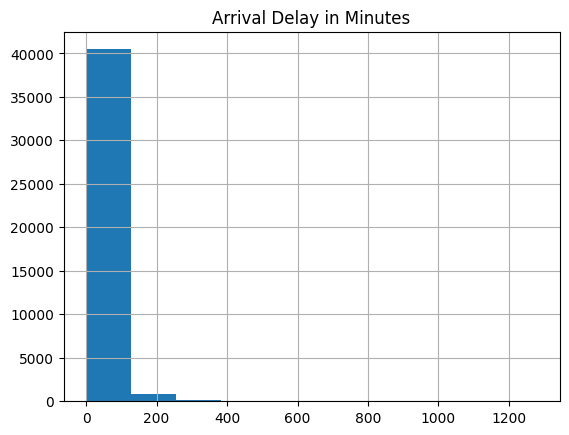

In [100]:
df_train[columns_with_nan].hist()

In [101]:
from sklearn.impute import KNNImputer

In [102]:
# Use KNNImputer to fill NaN values
imputer = KNNImputer(n_neighbors=3)
filled_data = imputer.fit_transform(df_train)

In [103]:
# Fill NaN with mean for each column
df_mean_filled = df_train.apply(lambda x: x.fillna(x.mean()), axis=0)

# Fill NaN with median for each column
df_median_filled = df_train.apply(lambda x: x.fillna(x.median()), axis=0)

# Fill NaN with KNN
df_knn_filled = pd.DataFrame(filled_data, columns=df_train.columns)

In [104]:
# Calculate original Spearman correlation matrix
spearman_corr_original = df_train.corr(method='spearman')

In [105]:
# Calculate Spearman correlation for each filled DataFrame
spearman_corr_mean_filled = df_mean_filled.corr(method='spearman')
spearman_corr_median_filled = df_median_filled.corr(method='spearman')
spearman_corr_knn_filled = df_knn_filled.corr(method='spearman')

In [106]:
# Calculate the mean differences for each column
mean_diff_mean = spearman_corr_mean_filled[columns_with_nan].sub(spearman_corr_original[columns_with_nan], axis=0).abs().mean()
mean_diff_median = spearman_corr_median_filled[columns_with_nan].sub(spearman_corr_original[columns_with_nan], axis=0).abs().mean()
mean_diff_knn = spearman_corr_knn_filled[columns_with_nan].sub(spearman_corr_original[columns_with_nan], axis=0).abs().mean()

In [107]:
# Determine the best approach for each column
best_approach = pd.DataFrame({
    'mean': mean_diff_mean,
    'median': mean_diff_median,
    'KNN': mean_diff_knn
})

In [108]:
best_approach

,mean,median,KNN
Arrival Delay in Minutes,0.000248,0.000317,0.000254


In [109]:
best_approach.idxmin(axis=1)

Arrival Delay in Minutes    mean
dtype: object

In [110]:
# Calculate descriptive statistics for the original DataFrame
original_stats = df_train[columns_with_nan].describe()

# Calculate descriptive statistics for the filled DataFrame
filled_stats_mean = df_mean_filled[columns_with_nan].describe()

# Calculate the differences in means
mean_diff = filled_stats_mean.loc['mean'] - original_stats.loc['mean']

# Calculate the differences in standard deviations
std_diff = filled_stats_mean.loc['std'] - original_stats.loc['std']

# Create a DataFrame to display the differences
diff_df = pd.DataFrame({
    'mean_diff': mean_diff,
    'std_diff': std_diff
})
diff_df

,mean_diff,std_diff
Arrival Delay in Minutes,0.0,-0.059563


In [111]:
# Calculate descriptive statistics for the original DataFrame
original_stats = df_train[columns_with_nan].describe()

# Calculate descriptive statistics for the filled DataFrame
filled_stats_median = df_median_filled[columns_with_nan].describe()

# Calculate the differences in means
mean_diff = filled_stats_median.loc['mean'] - original_stats.loc['mean']

# Calculate the differences in standard deviations
std_diff = filled_stats_median.loc['std'] - original_stats.loc['std']

# Create a DataFrame to display the differences
diff_df = pd.DataFrame({
    'mean_diff': mean_diff,
    'std_diff': std_diff
})
diff_df

,mean_diff,std_diff
Arrival Delay in Minutes,-0.046742,-0.050401


In [112]:
# Calculate descriptive statistics for the original DataFrame
original_stats = df_train[columns_with_nan].describe()

# Calculate descriptive statistics for the filled DataFrame
filled_stats_knn = df_knn_filled[columns_with_nan].describe()

# Calculate the differences in means
mean_diff = filled_stats_knn.loc['mean'] - original_stats.loc['mean']

# Calculate the differences in standard deviations
std_diff = filled_stats_knn.loc['std'] - original_stats.loc['std']

# Create a DataFrame to display the differences
diff_df = pd.DataFrame({
    'mean_diff': mean_diff,
    'std_diff': std_diff
})
diff_df

,mean_diff,std_diff
Arrival Delay in Minutes,0.048468,0.047939


In [113]:
df_train['Arrival Delay in Minutes'] = df_knn_filled['Arrival Delay in Minutes'].tolist()

In [114]:
df_train.isnull().sum()

Age                                     0
Flight Distance                         0
Inflight wifi service                   0
Departure/Arrival time convenient       0
Ease of Online booking                  0
Gate location                           0
Food and drink                          0
Online boarding                         0
Seat comfort                            0
Inflight entertainment                  0
On-board service                        0
Leg room service                        0
Baggage handling                        0
Checkin service                         0
Inflight service                        0
Cleanliness                             0
Departure Delay in Minutes              0
Arrival Delay in Minutes                0
Gender_Female                           0
Gender_Male                             0
Customer Type_Loyal Customer            0
Customer Type_disloyal Customer         0
Type of Travel_Business travel          0
Type of Travel_Personal Travel    

In [115]:
# List of original categorical columns
original_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

# Reverting one-hot encoding
for column in original_columns:
    # Extract the one-hot columns related to the original column
    one_hot_columns = [col for col in df_train.columns if col.startswith(column)]
    
    # Determine the original categorical values
    df_train[column] = df_train[one_hot_columns].idxmax(axis=1).apply(lambda x: x.replace(column + '_', ''))
    
    # Drop the one-hot columns
    df_train = df_train.drop(columns=one_hot_columns)

In [116]:
df_train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class,satisfaction
266,37,1801,2,4,3,3,4,4,3,2,...,1,2,4,0,0.0,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
62627,25,2174,2,4,4,4,2,2,2,2,...,2,4,2,0,0.0,Male,Loyal Customer,Business travel,Business,neutral or dissatisfied
61446,66,1947,1,2,5,5,1,1,1,1,...,1,3,1,0,0.0,Male,Loyal Customer,Business travel,Eco,neutral or dissatisfied
64495,52,680,2,5,2,4,5,5,5,1,...,3,1,5,77,67.0,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
69454,45,416,3,0,3,2,2,3,2,2,...,4,4,2,18,1.0,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied


In [117]:
df_train.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'],
      dtype='object')

<Axes: xlabel='satisfaction', ylabel='count'>

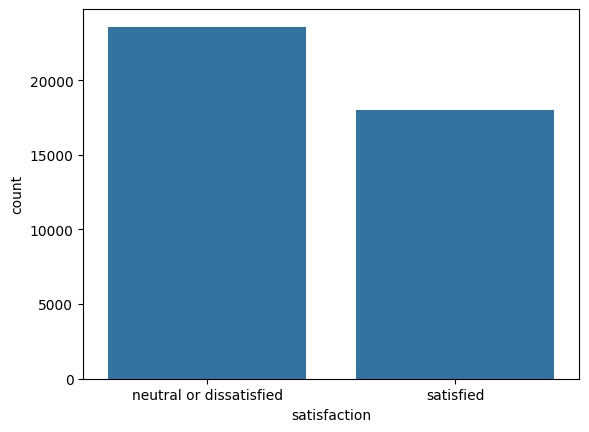

In [118]:
sns.countplot(df_train,x='satisfaction')

# Analisando correlação entre as features

In [119]:
def get_highly_correlated_features(correlation_matrix, threshold):
  correlated_pairs = []
  for i in range(len(correlation_matrix.columns)):
    for j in range(i):
      if abs(correlation_matrix.iloc[i, j]) > threshold:
        pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
        coefficient = correlation_matrix.iloc[i, j]
        correlated_pairs.append((pair, coefficient))
  return sorted(correlated_pairs, key= lambda pair: pair[1], reverse=True)

In [120]:
corr_matrix = df_train.corr().abs()
correlation_list = get_highly_correlated_features(corr_matrix, 0.95)

/var/folders/fs/f8qz96w55l1cqqbyb70x11380000gn/T/ipykernel_80620/3463624430.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr().abs()


In [121]:
correlation_list[:10]

[(('Arrival Delay in Minutes', 'Departure Delay in Minutes'),
  0.9657967529255008)]

In [122]:
# Drop high correlated features in correlation list
f2drop = []
for feature_pair, _ in correlation_list:
  if feature_pair[0] not in f2drop and feature_pair[1] not in f2drop:
    f2drop.append(feature_pair[1])

In [123]:
df_train = df_train.drop(f2drop, axis='columns')
df_val = df_val.drop(f2drop, axis='columns')

# Normalizando os valores

In [124]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [125]:
# Identify categorical columns for one-hot encoding
categorical_columns = df_train.select_dtypes(include=['object']).columns.tolist()

# Initialize OneHotEncoder and fit it on the training data
encoder = OneHotEncoder(sparse_output=False, drop='first',  handle_unknown='ignore')
encoder.fit(df_train[categorical_columns])

# Transform the training data
train_encoded = encoder.transform(df_train[categorical_columns])
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Drop original categorical columns and merge the encoded columns in train data
df_train = df_train.drop(columns=categorical_columns).reset_index(drop=True)
df_train = pd.concat([df_train, train_encoded_df], axis=1)

# Identify numerical columns for normalization
numerical_columns = df_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Initialize StandardScaler and fit it on the training data
scaler = MinMaxScaler()
scaler.fit(df_train[numerical_columns])

# Transform the numerical columns in the training data
train_normalized = scaler.transform(df_train[numerical_columns])
train_normalized_df = pd.DataFrame(train_normalized, columns=numerical_columns)

# Merge the normalized columns in train data
df_train = pd.concat([df_train.drop(columns=numerical_columns).reset_index(drop=True), train_normalized_df], axis=1)

In [126]:
# Function to transform validation and test data using the fitted encoder and scaler
def transform_data(df, encoder, scaler, categorical_columns, numerical_columns, reference_columns):
    encoded = encoder.transform(df[categorical_columns])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_columns))
    
    df = df.drop(columns=categorical_columns).reset_index(drop=True)
    df = pd.concat([df, encoded_df], axis=1)

    # Add missing columns with zero values
    for col in reference_columns:
        if col not in df.columns:
            df[col] = 0

    # Ensure the order of columns matches the reference
    df = df[reference_columns]

    normalized = scaler.transform(df[numerical_columns])
    normalized_df = pd.DataFrame(normalized, columns=numerical_columns)
    
    df = pd.concat([df.drop(columns=numerical_columns).reset_index(drop=True), normalized_df], axis=1)
    return df

# Get reference columns from the training data
reference_columns = df_train.columns

# Apply transformations to validation and test data
df_val = transform_data(df_val, encoder, scaler, categorical_columns, numerical_columns, reference_columns)
df_test = transform_data(df_test, encoder, scaler, categorical_columns, numerical_columns, reference_columns)

In [127]:
df_train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,0.384615,0.357431,0.4,0.8,0.6,0.50,0.8,0.8,0.50,0.4,...,0.00,0.4,0.8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.230769,0.432754,0.4,0.8,0.8,0.75,0.4,0.4,0.25,0.4,...,0.25,0.8,0.4,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
2,0.756410,0.386914,0.2,0.4,1.0,1.00,0.2,0.2,0.00,0.2,...,0.00,0.6,0.2,0.000000,1.0,0.0,0.0,1.0,0.0,0.0
3,0.576923,0.131058,0.4,1.0,0.4,0.75,1.0,1.0,1.00,0.2,...,0.50,0.2,1.0,0.052344,0.0,0.0,1.0,1.0,0.0,0.0
4,0.487179,0.077746,0.6,0.0,0.6,0.25,0.4,0.6,0.25,0.4,...,0.75,0.8,0.4,0.000781,0.0,1.0,0.0,1.0,0.0,0.0


In [128]:
df_train.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Arrival Delay in Minutes', 'Gender_Male',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus', 'satisfaction_satisfied'],
      dtype='object')

In [129]:
X_train = df_train.drop(columns=['satisfaction_satisfied'])
y_train = df_train['satisfaction_satisfied'].tolist()

X_val = df_val.drop(columns=['satisfaction_satisfied'])
y_val = df_val['satisfaction_satisfied'].tolist()

X_test = df_test.drop(columns=['satisfaction_satisfied'])
y_test = df_test['satisfaction_satisfied'].tolist()

# Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

In [120]:
n_estimators = 100
max_depth = None
max_features = 1
bootstrap = True

model_rforest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, 
                                       max_features=max_features, bootstrap=bootstrap, random_state=RANDOM_SEED).fit(X_train, y_train)

## Conjunto de validação

In [48]:
def plot_roc_curve(y_true, y_score, max_fpr=1.0):
  fpr, tpr, thresholds = roc_curve(y_true, y_score)
  aucroc = roc_auc_score(y_true, y_score)
  plt.plot(100*fpr[fpr < max_fpr], 100*tpr[fpr < max_fpr], label=f'ROC Curve (AUC = {aucroc:.4f})')
  plt.xlim(-2,102)
  plt.xlabel('FPR (%)')
  plt.ylabel('TPR (%)')
  plt.legend()
  plt.title('ROC Curve and AUCROC')

In [49]:
def get_overall_metrics(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  acc = (tp+tn)/(tp+tn+fp+fn)
  tpr = tp/(tp+fn)
  fpr = fp/(fp+tn)
  precision = tp/(tp+fp)
  f1 = (2*tpr*precision)/(tpr+precision)
  return {'acc':acc,'tpr':tpr,'fpr':fpr,'precision':precision,'f1-score':f1}

In [50]:
def plot_confusion_matrix(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  group_counts = [f'{value:.0f}' for value in confusion_matrix(y_true, y_pred).ravel()]
  group_percentages = [f'{value*100:.2f}%' for value in confusion_matrix(y_true, y_pred).ravel()/np.sum(cm)]
  labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts, group_percentages)]
  labels = np.array(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, cmap='Oranges', xticklabels=['Predicted Benign', 'Predicted Malicious'], yticklabels=['Actual Benign', 'Actual Malicious'], fmt='')
  return

In [124]:
val_scores_rforest = model_rforest.predict_proba(X_val)[:, 1]

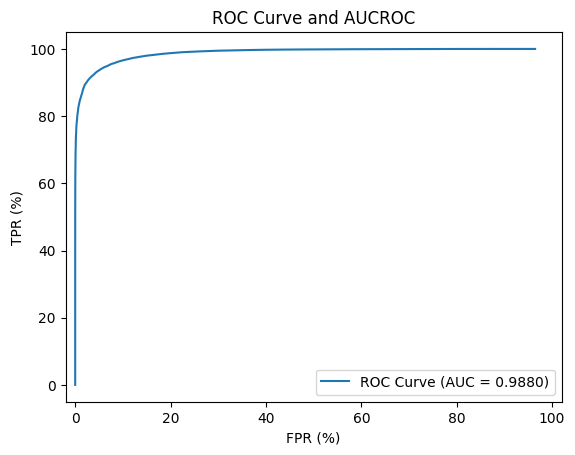

In [125]:
plot_roc_curve(y_val, val_scores_rforest)

In [128]:
fpr, tpr, thresholds = roc_curve(y_val, val_scores_rforest)
df_val_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds})
df_val_roc['youden-index'] = df_val_roc['tpr'] - df_val_roc['fpr']
df_val_roc.sort_values('youden-index', ascending=False).drop_duplicates('tpr').query('tpr > 0.9').head()

,fpr,tpr,thresholds,youden-index
57,0.044700,0.931179,0.44,0.886479
58,0.047504,0.933952,0.43,0.886448
59,0.050082,0.936467,0.42,0.886385
60,0.052660,0.938760,0.41,0.886100
56,0.042292,0.928294,0.45,0.886002


In [129]:
BEST_RFOREST_VALIDATION_THRESHOLD = 0.44

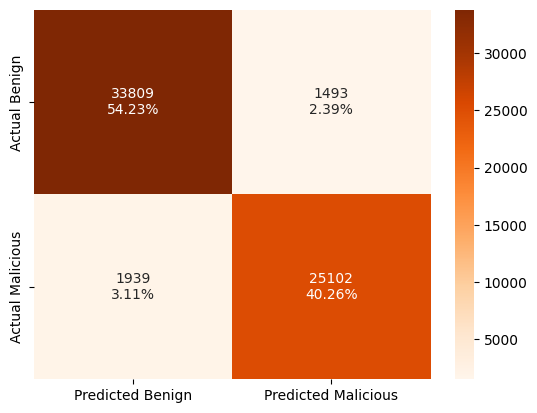

In [130]:
plot_confusion_matrix(y_val, val_scores_rforest > BEST_RFOREST_VALIDATION_THRESHOLD)

In [131]:
get_overall_metrics(y_val, val_scores_rforest > BEST_RFOREST_VALIDATION_THRESHOLD)

{'acc': 0.9449497136807661,
 'tpr': 0.9282940719647942,
 'fpr': 0.042292221403886464,
 'precision': 0.9438616281255875,
 'f1-score': 0.9360131255127154}

# Random Forest Oversampling

In [51]:
# Assuming df is your DataFrame containing the dataset
# Separate the minority and majority classes
df_minority = df_train[df_train['satisfaction_satisfied'] == 1]
df_majority = df_train[df_train['satisfaction_satisfied'] == 0]

# Calculate the difference in counts between the classes
minority_count = len(df_minority)
majority_count = len(df_majority)

# Duplicate the minority class to balance the dataset
df_minority_resampled = df_minority.sample(n=majority_count, replace=True, random_state=RANDOM_SEED)

# Combine the resampled minority class with the original majority class
df_resampled = pd.concat([df_minority_resampled, df_majority], ignore_index=True)

# Now df_resampled contains your duplicated (oversampled) dataset

<Axes: xlabel='satisfaction_satisfied', ylabel='count'>

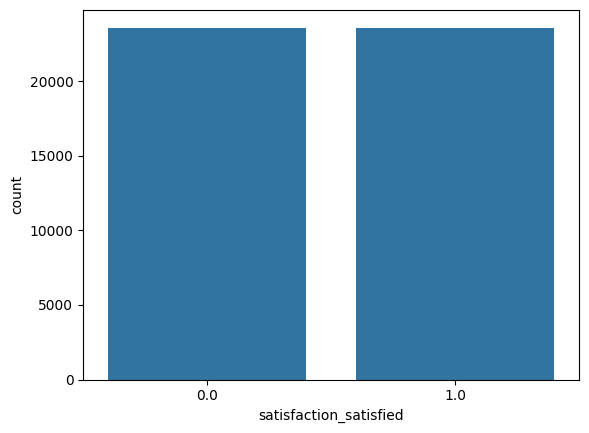

In [52]:
sns.countplot(df_resampled,x='satisfaction_satisfied')

In [53]:
X_train = df_resampled.drop(columns=['satisfaction_satisfied'])
y_train = df_resampled['satisfaction_satisfied'].tolist()

X_val = df_val.drop(columns=['satisfaction_satisfied'])
y_val = df_val['satisfaction_satisfied'].tolist()

In [54]:
n_estimators = 100
max_depth = None
max_features = 1
bootstrap = True

model_rforest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, 
                                       max_features=max_features, bootstrap=bootstrap, random_state=RANDOM_SEED).fit(X_train, y_train)

NameError: name 'RandomForestClassifier' is not defined

## Conjunto de validação

In [139]:
val_scores_rforest = model_rforest.predict_proba(X_val)[:, 1]

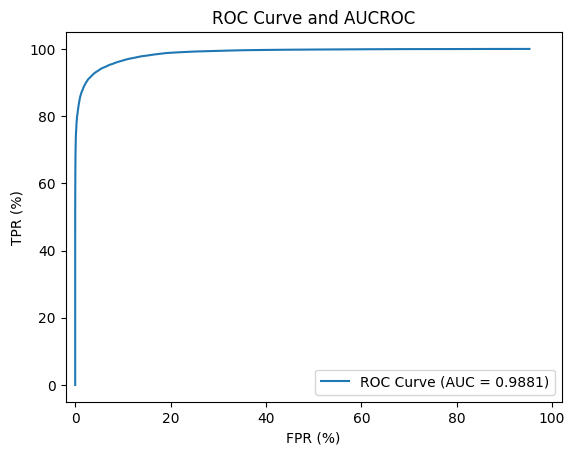

In [140]:
plot_roc_curve(y_val, val_scores_rforest)

In [141]:
fpr, tpr, thresholds = roc_curve(y_val, val_scores_rforest)
df_val_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds})
df_val_roc['youden-index'] = df_val_roc['tpr'] - df_val_roc['fpr']
df_val_roc.sort_values('youden-index', ascending=False).drop_duplicates('tpr').query('tpr > 0.9').head()

,fpr,tpr,thresholds,youden-index
59,0.044133,0.931733,0.42,0.887600
58,0.041556,0.929145,0.43,0.887589
57,0.038978,0.926408,0.44,0.887430
60,0.046768,0.933989,0.41,0.887221
62,0.052745,0.939943,0.39,0.887198


In [143]:
BEST_RFOREST_VALIDATION_THRESHOLD = 0.42

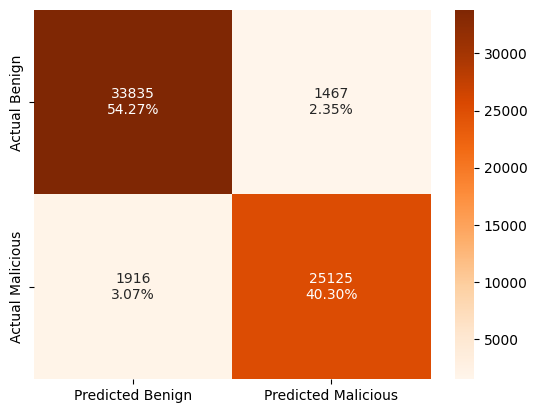

In [144]:
plot_confusion_matrix(y_val, val_scores_rforest > BEST_RFOREST_VALIDATION_THRESHOLD)

In [145]:
get_overall_metrics(y_val, val_scores_rforest > BEST_RFOREST_VALIDATION_THRESHOLD)

{'acc': 0.9457356880483775,
 'tpr': 0.9291446322251397,
 'fpr': 0.04155571922270693,
 'precision': 0.9448330324909747,
 'f1-score': 0.9369231629780173}

# Random Forest

In [195]:
import optuna

In [210]:
def objective(trial):
    # Define hyperparameters to tune 
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 20, 200, step=20),
        'max_depth': trial.suggest_categorical('max_depth', [None] + list(range(2, 33, 2))),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }

    # Initialize the model with current parameters
    model = RandomForestClassifier(**params, random_state=RANDOM_SEED).fit(X_train, y_train)

    # Calculate cross-validation score
    val_scores_rforest = model.predict_proba(X_val)[:, 1]

    aucroc = roc_auc_score(y_val, val_scores_rforest)

    return aucroc

In [211]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
print('Best hyperparameters: ', study.best_params)

[I 2024-07-02 20:33:58,589] A new study created in memory with name: no-name-400bb323-f78e-4e15-820d-12088dd45ca8
[I 2024-07-02 20:34:16,658] Trial 0 finished with value: 0.9866210669282269 and parameters: {'n_estimators': 200, 'max_depth': 8, 'max_features': None}. Best is trial 0 with value: 0.9866210669282269.
[I 2024-07-02 20:34:46,426] Trial 1 finished with value: 0.9918115570044291 and parameters: {'n_estimators': 200, 'max_depth': 28, 'max_features': None}. Best is trial 1 with value: 0.9918115570044291.
[I 2024-07-02 20:34:49,981] Trial 2 finished with value: 0.9918142953201802 and parameters: {'n_estimators': 100, 'max_depth': 14, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.9918142953201802.
[I 2024-07-02 20:34:56,186] Trial 3 finished with value: 0.9905584370922271 and parameters: {'n_estimators': 40, 'max_depth': 26, 'max_features': None}. Best is trial 2 with value: 0.9918142953201802.
[I 2024-07-02 20:34:57,787] Trial 4 finished with value: 0.991874133909435 and

Best hyperparameters:  {'n_estimators': 180, 'max_depth': 24, 'max_features': 'log2'}


In [73]:
params = {'n_estimators': 180, 'max_depth': 24, 'max_features': 'log2'}

model_rforest = model = RandomForestClassifier(**params, random_state=RANDOM_SEED).fit(X_train, y_train)

## Conjunto de validação

In [74]:
val_scores_rforest = model_rforest.predict_proba(X_val)[:, 1]

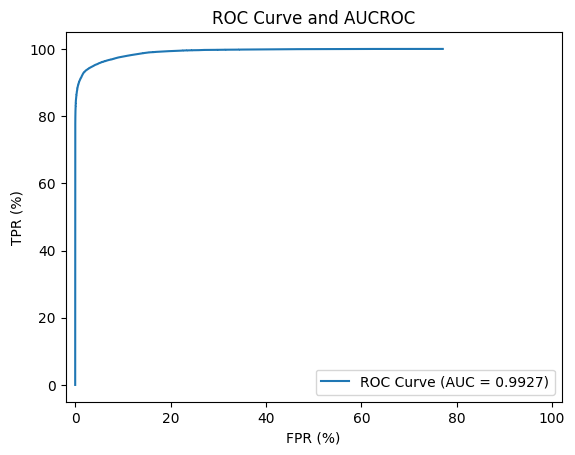

In [75]:
plot_roc_curve(y_val, val_scores_rforest)

In [76]:
fpr, tpr, thresholds = roc_curve(y_val, val_scores_rforest)
df_val_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds})
df_val_roc['youden-index'] = df_val_roc['tpr'] - df_val_roc['fpr']
df_val_roc.sort_values('youden-index', ascending=False).drop_duplicates('tpr').query('tpr > 0.9').head()

,fpr,tpr,thresholds,youden-index
1530,0.025324,0.939092,0.472814,0.913768
1532,0.025381,0.939129,0.472554,0.913748
1524,0.025211,0.938908,0.474444,0.913697
1522,0.025183,0.938871,0.474561,0.913688
1528,0.025296,0.938982,0.473850,0.913686


In [77]:
BEST_RFOREST_VALIDATION_THRESHOLD = 0.472814

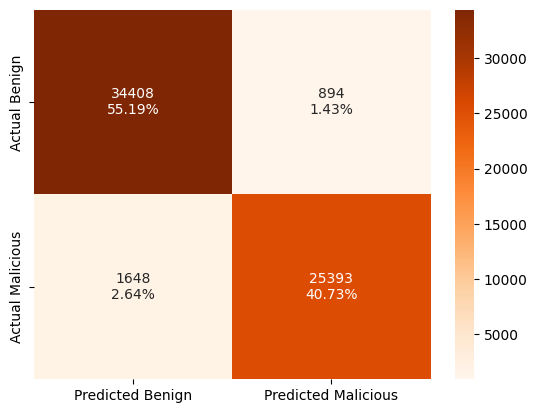

In [78]:
plot_confusion_matrix(y_val, val_scores_rforest > BEST_RFOREST_VALIDATION_THRESHOLD)

In [79]:
get_overall_metrics(y_val, val_scores_rforest > BEST_RFOREST_VALIDATION_THRESHOLD)

{'acc': 0.9592255746435044,
 'tpr': 0.9390555083022077,
 'fpr': 0.02532434422978868,
 'precision': 0.9659907939285578,
 'f1-score': 0.9523327332733273}

## Conjunto de teste

In [130]:
test_scores_rforest = model_rforest.predict_proba(X_test)[:, 1]

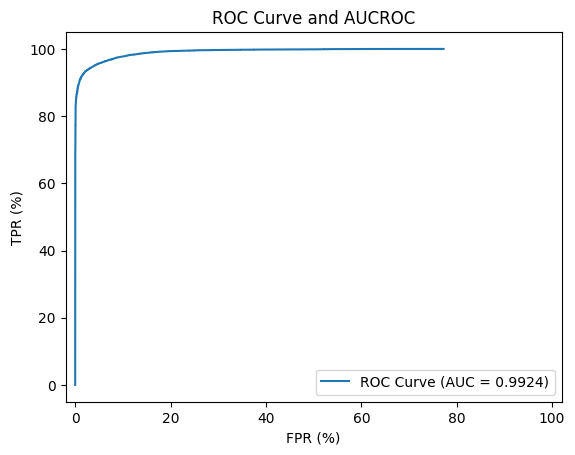

In [131]:
plot_roc_curve(y_test, test_scores_rforest)

In [140]:
y_test = np.array(y_test)

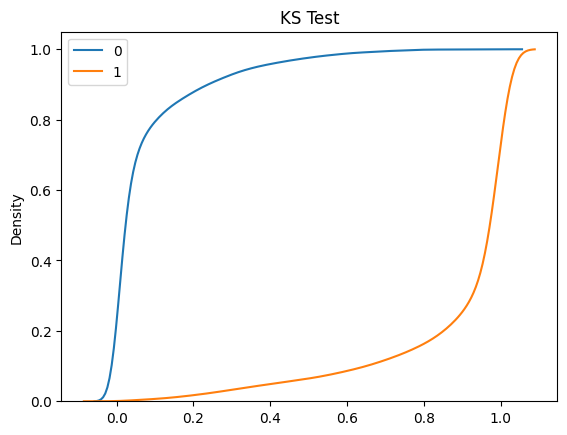

In [141]:
y_test_0 = test_scores_rforest[y_test == 0]
y_test_1 = test_scores_rforest[y_test == 1]

ks_2samp(y_test_0, y_test_1)

# KS Test plot
plt.figure()
sns.kdeplot(y_test_0, cumulative=True, label="0")
sns.kdeplot(y_test_1, cumulative=True, label="1")
plt.title("KS Test")
plt.legend()
plt.show()

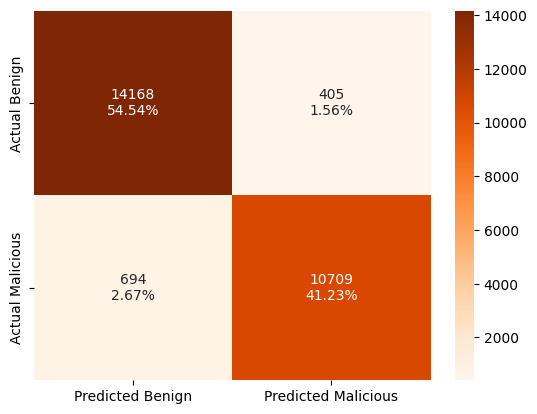

In [132]:
plot_confusion_matrix(y_test, test_scores_rforest > BEST_RFOREST_VALIDATION_THRESHOLD)

In [133]:
get_overall_metrics(y_test, test_scores_rforest > BEST_RFOREST_VALIDATION_THRESHOLD)

{'acc': 0.9576917154296274,
 'tpr': 0.9391388231167237,
 'fpr': 0.02779112056542922,
 'precision': 0.9635594745366205,
 'f1-score': 0.9511924323844206}

# Gradient Boosting

In [148]:
# Use KNNImputer to fill NaN values
imputer = KNNImputer(n_neighbors=3)
filled_data = imputer.fit_transform(X_val)
# Fill NaN with KNN
df_knn_filled = pd.DataFrame(filled_data, columns=X_val.columns)
X_val['Arrival Delay in Minutes'] = df_knn_filled['Arrival Delay in Minutes'].tolist()

In [149]:
# Use KNNImputer to fill NaN values
imputer = KNNImputer(n_neighbors=3)
filled_data = imputer.fit_transform(X_test)
# Fill NaN with KNN
df_knn_filled = pd.DataFrame(filled_data, columns=X_test.columns)
X_test['Arrival Delay in Minutes'] = df_knn_filled['Arrival Delay in Minutes'].tolist()

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [230]:
def objective(trial):
    # Define hyperparameters to tune
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 60, 300, step=20),
        'max_depth': trial.suggest_categorical('max_depth', [None] + list(range(2, 33, 2))),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20, step=2),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 21, step=2),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, step=0.01),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0, step=0.1)
    }

    # Initialize the model with current parameters
    model = GradientBoostingClassifier(**params, random_state=RANDOM_SEED).fit(X_train, y_train)

    # Calculate validation AUC-ROC score
    val_scores_gboost = model.predict_proba(X_val)[:, 1]
    aucroc = roc_auc_score(y_val, val_scores_gboost)

    return aucroc

In [231]:
# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-07-02 21:13:36,990] A new study created in memory with name: no-name-2aa61432-079e-41c1-80ea-2e80333218db
[I 2024-07-02 21:14:42,448] Trial 0 finished with value: 0.9938119689418174 and parameters: {'n_estimators': 260, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 15, 'max_features': None, 'learning_rate': 0.15000000000000002, 'subsample': 0.6}. Best is trial 0 with value: 0.9938119689418174.
[I 2024-07-02 21:14:48,223] Trial 1 finished with value: 0.9932160668085017 and parameters: {'n_estimators': 60, 'max_depth': 24, 'min_samples_split': 14, 'min_samples_leaf': 13, 'max_features': 'sqrt', 'learning_rate': 0.06999999999999999, 'subsample': 0.6}. Best is trial 0 with value: 0.9938119689418174.
[I 2024-07-02 21:15:24,272] Trial 2 finished with value: 0.9945057485785204 and parameters: {'n_estimators': 240, 'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 13, 'max_features': None, 'learning_rate': 0.06999999999999999, 'subsample': 0.8}. Best is trial

In [145]:
params = {'n_estimators': 300, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': None, 'learning_rate': 0.06999999999999999, 'subsample': 0.8}

model_gboost = GradientBoostingClassifier(**params, random_state=RANDOM_SEED).fit(X_train, y_train)

## Conjunto de validação

In [150]:
val_scores_gboost = model_gboost.predict_proba(X_val)[:, 1]

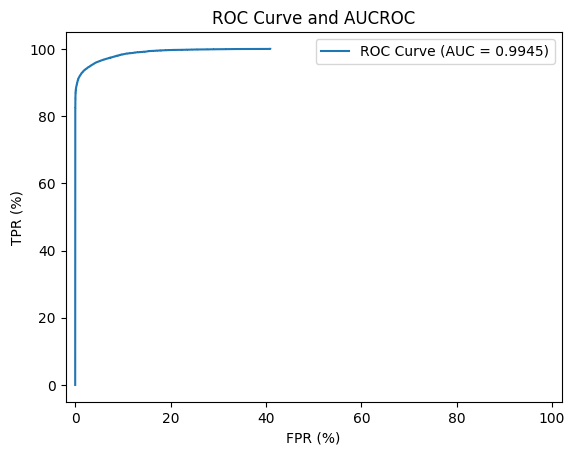

In [151]:
plot_roc_curve(y_val, val_scores_gboost)

In [152]:
fpr, tpr, thresholds = roc_curve(y_val, val_scores_gboost)
df_val_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds})
df_val_roc['youden-index'] = df_val_roc['tpr'] - df_val_roc['fpr']
df_val_roc.sort_values('youden-index', ascending=False).drop_duplicates('tpr').query('tpr > 0.9').head()

,fpr,tpr,thresholds,youden-index
1178,0.026457,0.944714,0.474973,0.918256
1176,0.026429,0.944677,0.475317,0.918248
1174,0.026401,0.944640,0.475386,0.918239
1172,0.026372,0.944603,0.475658,0.918230
1210,0.027534,0.945749,0.459709,0.918215


In [153]:
BEST_RFOREST_VALIDATION_THRESHOLD = 0.474973

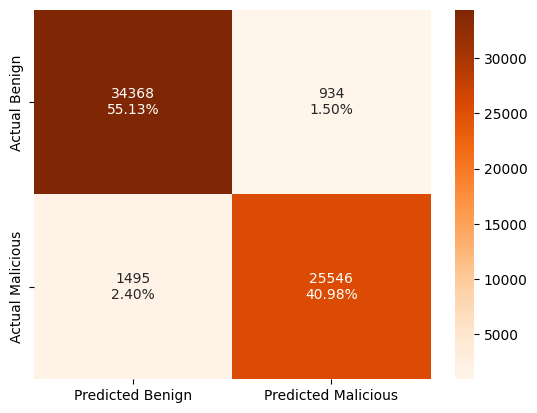

In [154]:
plot_confusion_matrix(y_val, val_scores_gboost > BEST_RFOREST_VALIDATION_THRESHOLD)

In [156]:
get_overall_metrics(y_val, val_scores_gboost > BEST_RFOREST_VALIDATION_THRESHOLD)

{'acc': 0.9610381277769757,
 'tpr': 0.9447135830775489,
 'fpr': 0.02645742450852643,
 'precision': 0.9647280966767372,
 'f1-score': 0.954615945143028}

## Conjunto de teste

In [157]:
test_scores_gboost = model_gboost.predict_proba(X_test)[:, 1]

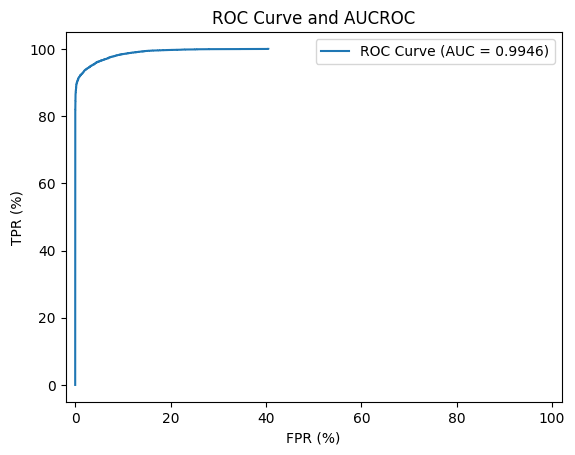

In [158]:
plot_roc_curve(y_test, test_scores_gboost)

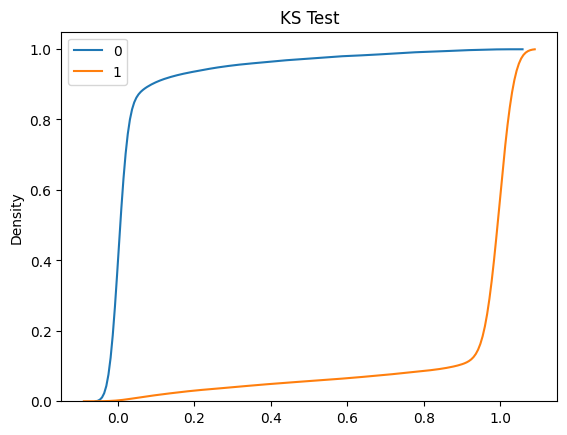

In [159]:
y_test_0 = test_scores_gboost[y_test == 0]
y_test_1 = test_scores_gboost[y_test == 1]

ks_2samp(y_test_0, y_test_1)

# KS Test plot
plt.figure()
sns.kdeplot(y_test_0, cumulative=True, label="0")
sns.kdeplot(y_test_1, cumulative=True, label="1")
plt.title("KS Test")
plt.legend()
plt.show()

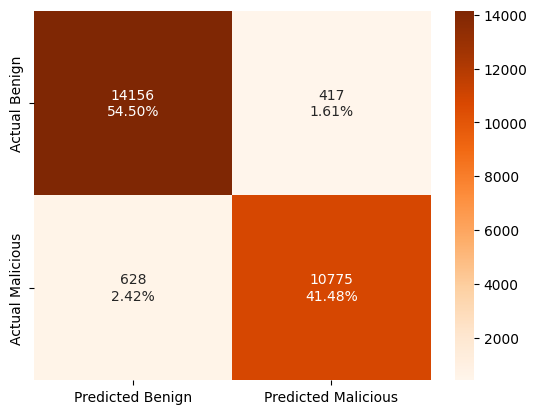

In [160]:
plot_confusion_matrix(y_test, test_scores_gboost > BEST_RFOREST_VALIDATION_THRESHOLD)

In [161]:
get_overall_metrics(y_test, test_scores_gboost > BEST_RFOREST_VALIDATION_THRESHOLD)

{'acc': 0.9597705574376347,
 'tpr': 0.9449267736560554,
 'fpr': 0.02861456117477527,
 'precision': 0.9627412437455325,
 'f1-score': 0.9537508298296083}